In [2]:
#Importing essentials
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import norm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import normalize

# Get current size
fig_size = plt.rcParams["figure.figsize"]
# Prints: [8.0, 6.0]
#print ("Current size:", fig_size)
# Set figure width to 12 and height to 9
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


In [3]:
def bindea(z,n):
    a=z+n
    p1=  15.76   *(a)
    p2=  -17.81  *(a**(2./3.))
    p3=  -0.711  * (z**2.) * a**(-1./3.)   
    p4=  -(23.702*((z-n)**2.))/a

    if(any(z)%2==0 and n%2==0):
        p5=34.*(a**(-3./4.))
        
    elif(any(z)%2==1 and any(n)%2==1):
        p5=-34.*(a**(-3./4.))
        
    else: 
        p5=0
        
    be=p1+p2+p3+p4+p5
    return be

No handles with labels found to put in legend.


(2611,)


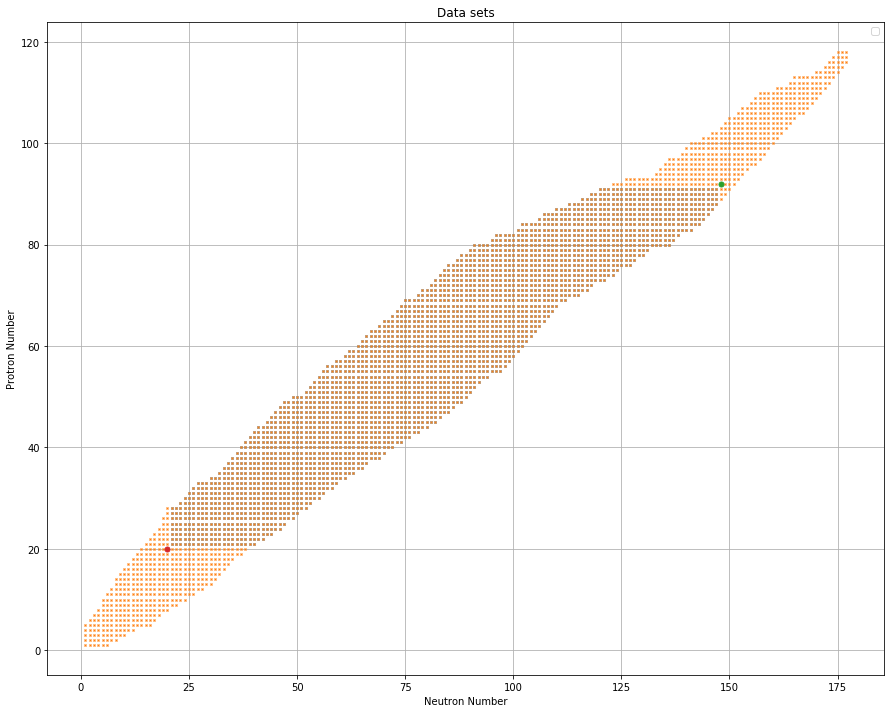

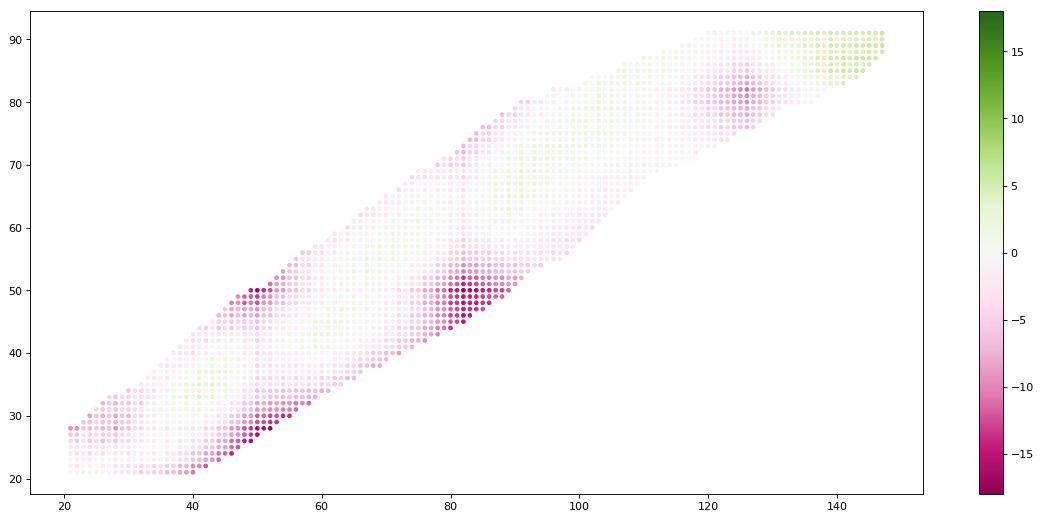

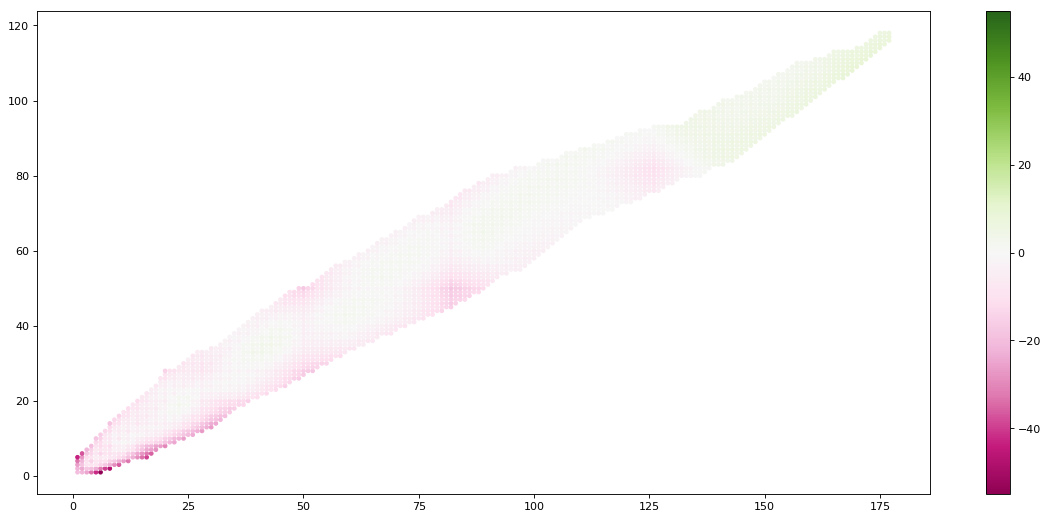

In [5]:
y_the=[]
N_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=3)#, skip_header=350, skip_footer=3433-2953) #Number of neutrons
Z_exp = np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=4)#, skip_header=350, skip_footer=3433-2953) #Number of protons
X_exp = np.transpose(np.stack((Z_exp,N_exp)))
A_exp = N_exp+Z_exp # Total number of Nucleons

# Difference between the experimental binding energy and the Liquid drop model
y_exp = -np.genfromtxt('EXPERIMENT_AME2016.dat',usecols=5)#, skip_header=350, skip_footer=3433-2953)
y_the=bindea(Z_exp,N_exp)
the_exp_diff=y_the-y_exp

ZN_exp=np.transpose(np.stack((Z_exp, N_exp, the_exp_diff, y_exp, y_the)))
Z_aug=[]
N_aug=[]

the_exp_diff_aug=[]

y_exp_aug=[]
y_the_aug=[]

for ZN_i in ZN_exp:
    if (ZN_i[0]>20) and (ZN_i[0]<92):
        if (ZN_i[1]>20) and (ZN_i[1]<240-92):
            #if (ZN_i[0]+ZN_i[1]>40) and (ZN_i[0]+ZN_i[1]<240):
            Z_aug.append(ZN_i[0])
            N_aug.append(ZN_i[1])
            the_exp_diff_aug.append(ZN_i[2])
            y_exp_aug.append(ZN_i[3])
            y_the_aug.append(ZN_i[4])
        

        
print(np.shape(Z_aug))
        
plt.title('Data sets')
plt.plot(N_aug, Z_aug,  'x', markersize=2, label="_aug")
plt.plot(N_exp, Z_exp,  'x', markersize=2, label="_exp")
plt.plot(240-92, 92,  'o',   markersize=5, label="_aug")
plt.plot(40-20, 20,  'o',   markersize=5, label="_aug")

plt.xlabel('Neutron Number')
plt.ylabel('Protron Number')
plt.legend()
plt.grid(True)
plt.show()


ext = np.int(np.ceil(max(-np.min(the_exp_diff_aug),np.max(the_exp_diff_aug))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_aug,Z_aug,c=the_exp_diff_aug,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
plt.colorbar(sc)
plt.show()

ext = np.int(np.ceil(max(-np.min(the_exp_diff),np.max(the_exp_diff))))
fig=plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
sc = plt.scatter(N_exp,Z_exp,c=the_exp_diff,cmap='PiYG',vmin=-ext,vmax=ext,s=10)
#plt.plot(np.transpose(zdripndep)[1][0:-1], np.transpose(zdripndep)[0][0:-1],label='python proton drip line')
#plt.plot(np.transpose(ndripzdep)[1][0:-1], np.transpose(ndripzdep)[0][0:-1],label='python Neutron drip line')
plt.colorbar(sc)
plt.show()


In [6]:
def ki(exp_the):
    ki_2=0
    
    for exp_the_i in exp_the:
        ki_2=ki_2+(exp_the_i[0]-exp_the_i[1])**2

    return np.sqrt(ki_2/(len(exp_the)+1))




y_exp_the=np.transpose(np.stack((y_exp,y_the)))

print("augmented: ", ki(y_exp_the),"\n")



y_exp_the_aug=np.transpose(np.stack((y_exp_aug, y_the_aug)))


y_train, y_test = train_test_split( y_exp_the_aug, test_size =0.25, random_state=42 )


print("augmented: ", ki(y_exp_the_aug))
print("trained:   ", ki(y_train))
print("test:      ", ki(y_test))

augmented:  6.262319820134366 

augmented:  4.381516172257923
trained:    4.430731527653787
test:       4.227200662812567
